In [182]:
from bs4 import BeautifulSoup
import requests
URL = "https://weather.naver.com/rgn/cityWetrMain.nhn"  #지역별 날씨
html = requests.get(URL).text
soup = BeautifulSoup(html, 'html.parser')
weatherTable = soup.select("li.nm")
#print(weatherTable)
tempTable = soup.find_all("span", class_="temp")
#print(tempTable)
rainTable = soup.find_all("span", class_="rain")
#print(rainTable)

weatherTable=[line.get_text().strip() for line in weatherTable]
tempTable=[line.get_text().strip() for line in tempTable]
rainTable=[line.get_text().strip() for line in rainTable]


In [177]:
from bs4 import BeautifulSoup
import requests
URL = "https://weather.naver.com/air/airFcast.nhn"  #미세먼지 
html = requests.get(URL).text
soup = BeautifulSoup(html, 'html.parser')
airTable = soup.find_all("div", class_="list_air_inn")
for air in airTable:
    today = air.find_all("li")
    for data in today:
        print(data.text)

미세먼지 보통
초미세먼지 보통
오존 보통
자외선 보통
황사 약함
미세먼지 보통
초미세먼지 보통
오존 보통
자외선 보통
황사 약함


In [183]:
a={'weather':weatherTable,'temp':tempTable , 'rain': rainTable}
df =pd.DataFrame.from_dict(a,orient='index')
df= df.transpose()

In [313]:
df= df.head(n=24)
df

idx={0:'서울경기',1: '서울경기' ,2: '서해5도',3: '서해5도'
    ,4: '강원영서',5: '강원영서',6: '강원영동',7: '강원영동'
    ,8: '충청북도',9: '충청북도',10: '충청남도',11: '충청남도'
    ,12: '경상북도',13: '경상북도',14: '경상남도',15: '경상남도'
    ,16: '울릉독도',17: '울릉독도',18: '전라북도',19: '전라북도'
    ,20: '전라남도',21: '전라남도',22: '제주',23: '제주'}

df['continent']=['서울경기','서울경기','서해5도','서해5도'
                       ,'강원영서','강원영서','강원영동','강원영동'
    ,'충청북도','충청북도','충청남도','충청남도'
    ,'경상북도','경상북도','경상남도','경상남도'
    ,'울릉독도','울릉독도','전라북도','전라북도'
    ,'전라남도','전라남도','제주','제주']

df['time']=['오전','오후','오전','오후','오전','오후','오전','오후',
                  '오전','오후','오전','오후','오전','오후','오전','오후',
                  '오전','오후','오전','오후','오전','오후','오전','오후',]

In [250]:
df['new_temp']=df['temp'].str.split('.')
df['new_temp']=df['new_temp'].str.get(0)

df['new_temp']=pd.to_numeric(df['new_temp'])
df.groupby('time')['new_temp'].mean()

# time(오전/오후로 groupby하여, 온도열의 평균값 구하기)

time
오전     7.833333
오후    12.833333
Name: new_temp, dtype: float64

In [252]:
df

,weather,temp,rain,continent,time,new_temp
0,흐리고 비,8.0℃,70%,서울경기,오전,8
1,구름많음,11.0℃,20%,서울경기,오후,11
2,구름많음,9.0℃,20%,서해5도,오전,9
3,구름많음,8.0℃,20%,서해5도,오후,8
4,흐리고 비,4.0℃,80%,강원영서,오전,4
5,흐림,8.0℃,30%,강원영서,오후,8
6,흐리고 한때 비,9.0℃,60%,강원영동,오전,9
7,흐리고 한때 비,16.0℃,60%,강원영동,오후,16
8,흐리고 비,5.0℃,70%,충청북도,오전,5
9,흐리고 한때 비,11.0℃,60%,충청북도,오후,11


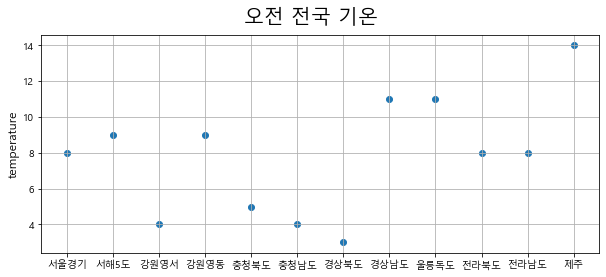

In [311]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

day_1=df[df['time']=='오전']
day_2=df[df['time']=='오후']

fig.suptitle("오전 전국 기온",fontsize=20)
plt.ylabel('temperature',fontsize=12)
axes.scatter(
    x=day_1['continent'],
    y=day_1['new_temp']
) 


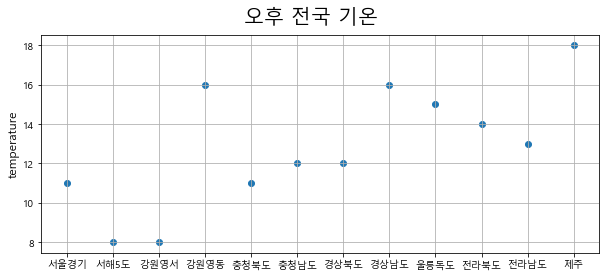

In [312]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

day_1=df[df['time']=='오전']
day_2=df[df['time']=='오후']

fig.suptitle("오후 전국 기온",fontsize=20)
plt.ylabel('temperature',fontsize=12)
axes1.scatter(
    x=day_2['continent'],
    y=day_2['new_temp']
) 
